K-means Clustering


In [2]:
# k-meas_project1
# 使用存檔於myfeature資料夾下的特徵矩陣
# Author: Yuan-Jen Chang, Feng Chia University, imCLOUD CO.,LTD.
# Date: Sep. 18 2024

# Importing the libraries
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Define directories
currentDirectory = '/content/drive/MyDrive/PHM_2024_Group6' # root Directory
healthyDataDirectory='/content/drive/MyDrive/PHM_2024_Group6/Data/Training/Healthy'
faulty1DataDirectory='/content/drive/MyDrive/PHM_2024_Group6/Data/Training/Faulty1'
faulty2DataDirectory='/content/drive/MyDrive/PHM_2024_Group6/Data/Training/Faulty2'
testingDataDirectory='/content/drive/MyDrive/PHM_2024_Group6/Data/Testing'
csvDirectory='/content/drive/MyDrive/PHM_2024_Group6/csv'
featureDirectory='/content/drive/MyDrive/PHM_2024_Group6/myfeature'

In [6]:
# 讀取檔案
os.chdir(featureDirectory) # Change directory to feature file directory
dataset = pd.read_csv('training_allFeature.csv') # (140, 30)
dataset3 = pd.read_csv('featureTesting.csv') # (28, 30)

In [9]:
########## Get the healthy and faulty features from feature directory ##########
os.chdir(currentDirectory) # Change directory to feature file directory
X = dataset.iloc[:, [61,68]].values #使用62-voltage-mean與69-voltage-Shape Factor
y = dataset.iloc[:, -1].values

# Define Test set
featureTesting = dataset3.iloc[:, :].values  #Faulty features
X_test0 = featureTesting[:,[61,68]]
y_test=featureTesting[:,-1] # Have known Healthy lable = 0, and Faulty1-Faulty6 lable = 1-3

In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  # Standarderize all training data
X = sc.fit_transform(X)
X_test = sc.transform(X_test0)


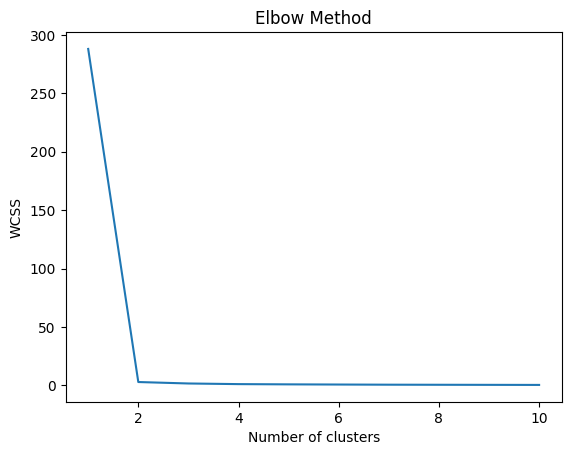

In [11]:
# Calculate WCSS
plt.figure()
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
#plt.plot(2,wcss[1],'ro-')
#plt.plot(7,wcss[6],'rs-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

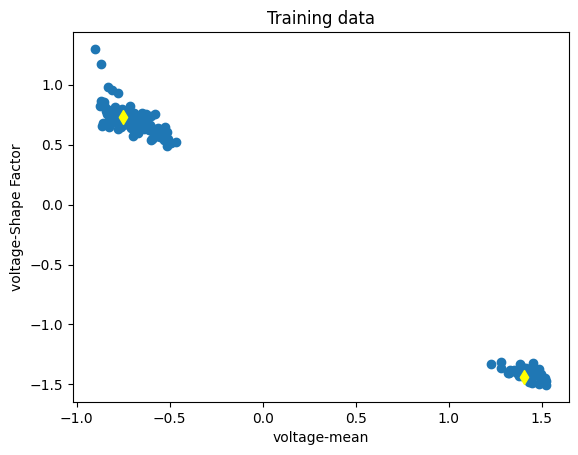

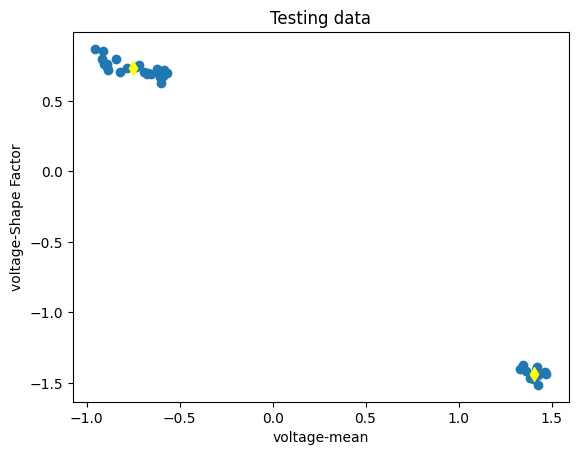

In [12]:
# K-Means
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
pred_y_test = kmeans.fit_predict(X_test)
#Plot training data
plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='d', s=50, c='yellow')
plt.xlabel('voltage-mean')
plt.ylabel('voltage-Shape Factor')
plt.title('Training data')
plt.show()
#Plot testing data
plt.figure()
plt.scatter(X_test[:,0], X_test[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='d', s=50, c='yellow')
plt.xlabel('voltage-mean')
plt.ylabel('voltage-Shape Factor')
plt.title('Testing data')
plt.show()